# Case Study: Sentiment Analysis

In this lab we use part of the 'Amazon_Unlocked_Mobile.csv' dataset published by Kaggle. The dataset contain the following information:
* Product Name
* Brand Name
* Price
* Rating
* Reviews
* Review Votes

We are mainly interested by the 'Reviews' (X) and by the 'Rating' (y)


The goal is to try to predict the 'Rating' after reading the 'Reviews'. I've prepared for you TRAIN and TEST set.
The work to be done is as follows:

1. Feature extraction and baseline
    * read the dataset and understand it
    * put it in a format so that you can use `CountVectorizer` or`Tf-IDF` to extract the desired features
    * perform on the desired dates and preprocessing
    * use one of the classifiers you know to predict the polarity of different sentences
1. My first neural network
    * reuse the features already extracted 
    * proposed a neural network built with Keras
1. Hyper-parameter fitting
    * for the base line: adjust min_df, max_df, ngram, max_features + model's hyper-parameter
    * for the neural network: adjust batch size, number of layers and number of neuron by layers, use earlystop
1. <span style="color:red">Word embedding
    * stage 1 build a network that uses Keras' embedding which is not language sensitive.
    * stage 2 build a network that simultaneously uses Keras' embedding and the features extracted in the first weeks.
    * stage 3 try to use an existing embedding (https://github.com/facebookresearch/MUSE)
    </span>

**WARNING:** the dataset is voluminous, I can only encourage you to work first on a small part of it and only at the end, when the code is well debugged and that it is necessary to build the "final model", to use the whole dataset.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-the-dataset" data-toc-modified-id="Read-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read the dataset</a></span></li><li><span><a href="#Text-normalisation" data-toc-modified-id="Text-normalisation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Text normalisation</a></span></li><li><span><a href="#Approach1---BOW-and-MLP-classifier" data-toc-modified-id="Approach1---BOW-and-MLP-classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Approach1 - BOW and MLP classifier</a></span></li><li><span><a href="#Approach2---Keras-word-embedding-and-MLP-classifier" data-toc-modified-id="Approach2---Keras-word-embedding-and-MLP-classifier-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Approach2 - Keras word embedding and MLP classifier</a></span></li><li><span><a href="#Approach3---Pre-trained-word-embedding-and-MLP-classifier" data-toc-modified-id="Approach3---Pre-trained-word-embedding-and-MLP-classifier-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Approach3 - Pre-trained word embedding and MLP classifier</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Come-back-to-your-favourite-sentence..." data-toc-modified-id="Come-back-to-your-favourite-sentence...-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Come back to your favourite sentence...</a></span></li></ul></div>

## Read the dataset

Could you find below a proposal. You can complete them.

In [1]:
import pandas as pd
import numpy as np

In [2]:
TRAIN = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/train.csv.gz")
TEST = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/test.csv.gz")

TRAIN.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Samsung Galaxy Note 4 N910C Unlocked Cellphone...,Samsung,449.99,4,I love it!!! I absolutely love it!! 👌👍,0.0
1,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,I love the BLU phones! This is my second one t...,4.0
2,Apple iPhone 6 128GB Silver AT&T,Apple,599.95,5,Great phone,1.0
3,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,51.99,4,Very happy with the performance. The apps work...,2.0
4,Huawei P8 Lite US Version- 5 Unlocked Android ...,Huawei,198.99,5,Easy to use great price,0.0


In [3]:
''' Construct X_train and y_train '''
X_train = TRAIN['Reviews']
y_train = TRAIN['Rating']-min(TRAIN['Rating'])

nb_classes = len(np.unique(y_train))

X_train.shape, y_train.shape

((5000,), (5000,))

In [4]:
''' Do the same for test '''
X_test = TEST['Reviews']
y_test = TEST['Rating']-min(TEST['Rating'])

nb_classes = len(np.unique(y_test))

X_test.shape, y_test.shape

((1000,), (1000,))

## Text normalisation

It's your job

* you can put all the text in lower case
* you can remove all english stop word
* you can remove all/some punctuation sign
* you can remove all number
* you can stem/lemmatize the english word
* ...

You can of course re-use the previously used preprocessing but also do nothing to spend essentially time on the first two approaches to using text with neural networks.

from keras.preprocessing.text import Tokenizer

tokenizer(num_wordS)
tokenizer.fit_on_texts(list(train))
train_X = tokenizer.texts_to_sequences(train)
test_X = tokenizer.texts_to_sequences
pad_sequence(train, maxlen)

from keras.layers import input, embedding

inputs = Input(shape=sequence_size)
embedding = Embedding(vocabulary_size, embedding_size, imput_length=sequence_size)(inputs)

In [5]:
''' Put your code here '''
import nltk # nltk.download()
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

def stem_sentences(sentence):
    """
    Performs stemming on a sentence
    """
    porter = PorterStemmer()
    token_words = word_tokenize(sentence)
    stemmed_sentence = []
    for word in token_words: stemmed_sentence.append(porter.stem(word))
    return " ".join(stemmed_sentence)

def lem_sentences(sentence):
    """
    Performs lemmatization on a sentence
    """
    lemmatizer = WordNetLemmatizer()
    token_words = word_tokenize(sentence)
    stemmed_sentence = []
    for word in token_words: stemmed_sentence.append(lemmatizer.lemmatize(word))
    return " ".join(stemmed_sentence)

def normalize_set(dataset, normalization="stem"):
    """
    Normalizes a dataset
    """
    for idx, entry in enumerate(dataset):
        if normalization == "stem": dataset[idx] = stem_sentences(entry)
        else: dataset[idx] = lem_sentences(entry)
    return dataset
''' After this stage '''

# X_train_norm contain normalized text for X_train
# X_test_norm contain normalized text for X_test
X_train_norm = normalize_set(X_train)
X_test_norm = normalize_set(X_test)

<ipython-input-5-ae9620cc0926>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if normalization == "stem": dataset[idx] = stem_sentences(entry)


In [6]:
X_train_norm.shape, X_test_norm.shape

((5000,), (1000,))

## Approach1 - BOW and MLP classifier
Could you find below a proposal. You can complete them.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

'''
Use CountVectorizer(...) or TfidfVectorizer(...)
'''
fe = TfidfVectorizer(binary = True, 
                     analyzer = "word", 
                     stop_words = "english", 
                     ngram_range = (1,4),
                     max_df = 2.0,
                     min_df = 40,
                     max_features = 200) 
X_train_enc = fe.fit_transform(X_train_norm).toarray()
X_train_enc.shape

(5000, 200)

In [8]:
'''
To make your task easier, I built a very rudimentary neural network.
It's up to you to make a more sophisticated one.
'''
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# This returns a tensor
inputs = Input(shape=(X_train_enc.shape[1],))

# a layer instance is callable on a tensor, and returns a tensor
predictions = Dense(nb_classes, activation='softmax')(inputs)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
dense (Dense)                (None, 5)                 1005      
Total params: 1,005
Trainable params: 1,005
Non-trainable params: 0
_________________________________________________________________


In [9]:
''' Fit your network - don't forget the use of EarlyStopping and other callbacks.'''
import tensorflow as tf

# Define a Callback class that stops training once accuracy reaches 97.0%
class early_stopping(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.97):
            print("\nReached 97.0% accuracy so cancelling training!")
            self.model.stop_training = True

history = model.fit(X_train_enc, 
                    y_train, 
                    batch_size=32,
                    epochs=1000,
                    validation_split=0.1,
                    callbacks=[early_stopping()],
                    verbose=2)

Epoch 1/1000
141/141 - 1s - loss: 1.5145 - accuracy: 0.4671 - val_loss: 1.4256 - val_accuracy: 0.5660
Epoch 2/1000
141/141 - 0s - loss: 1.3942 - accuracy: 0.5353 - val_loss: 1.3347 - val_accuracy: 0.5660
Epoch 3/1000
141/141 - 0s - loss: 1.3365 - accuracy: 0.5353 - val_loss: 1.2908 - val_accuracy: 0.5660
Epoch 4/1000
141/141 - 0s - loss: 1.3086 - accuracy: 0.5353 - val_loss: 1.2682 - val_accuracy: 0.5660
Epoch 5/1000
141/141 - 0s - loss: 1.2935 - accuracy: 0.5353 - val_loss: 1.2554 - val_accuracy: 0.5660
Epoch 6/1000
141/141 - 0s - loss: 1.2842 - accuracy: 0.5353 - val_loss: 1.2471 - val_accuracy: 0.5660
Epoch 7/1000
141/141 - 0s - loss: 1.2775 - accuracy: 0.5353 - val_loss: 1.2412 - val_accuracy: 0.5660
Epoch 8/1000
141/141 - 0s - loss: 1.2721 - accuracy: 0.5353 - val_loss: 1.2366 - val_accuracy: 0.5660
Epoch 9/1000
141/141 - 0s - loss: 1.2676 - accuracy: 0.5353 - val_loss: 1.2329 - val_accuracy: 0.5660
Epoch 10/1000
141/141 - 0s - loss: 1.2635 - accuracy: 0.5353 - val_loss: 1.2295 - 

Epoch 81/1000
141/141 - 0s - loss: 1.1262 - accuracy: 0.5707 - val_loss: 1.1131 - val_accuracy: 0.5780
Epoch 82/1000
141/141 - 0s - loss: 1.1250 - accuracy: 0.5727 - val_loss: 1.1120 - val_accuracy: 0.5800
Epoch 83/1000
141/141 - 0s - loss: 1.1238 - accuracy: 0.5722 - val_loss: 1.1110 - val_accuracy: 0.5820
Epoch 84/1000
141/141 - 0s - loss: 1.1226 - accuracy: 0.5742 - val_loss: 1.1101 - val_accuracy: 0.5820
Epoch 85/1000
141/141 - 0s - loss: 1.1214 - accuracy: 0.5742 - val_loss: 1.1092 - val_accuracy: 0.5840
Epoch 86/1000
141/141 - 0s - loss: 1.1203 - accuracy: 0.5764 - val_loss: 1.1082 - val_accuracy: 0.5840
Epoch 87/1000
141/141 - 0s - loss: 1.1192 - accuracy: 0.5769 - val_loss: 1.1072 - val_accuracy: 0.5840
Epoch 88/1000
141/141 - 0s - loss: 1.1180 - accuracy: 0.5787 - val_loss: 1.1063 - val_accuracy: 0.5840
Epoch 89/1000
141/141 - 0s - loss: 1.1169 - accuracy: 0.5793 - val_loss: 1.1053 - val_accuracy: 0.5840
Epoch 90/1000
141/141 - 0s - loss: 1.1158 - accuracy: 0.5796 - val_loss: 

Epoch 160/1000
141/141 - 0s - loss: 1.0570 - accuracy: 0.6200 - val_loss: 1.0572 - val_accuracy: 0.6180
Epoch 161/1000
141/141 - 0s - loss: 1.0563 - accuracy: 0.6207 - val_loss: 1.0567 - val_accuracy: 0.6180
Epoch 162/1000
141/141 - 0s - loss: 1.0557 - accuracy: 0.6207 - val_loss: 1.0562 - val_accuracy: 0.6200
Epoch 163/1000
141/141 - 0s - loss: 1.0550 - accuracy: 0.6213 - val_loss: 1.0557 - val_accuracy: 0.6200
Epoch 164/1000
141/141 - 0s - loss: 1.0544 - accuracy: 0.6220 - val_loss: 1.0553 - val_accuracy: 0.6200
Epoch 165/1000
141/141 - 0s - loss: 1.0538 - accuracy: 0.6213 - val_loss: 1.0548 - val_accuracy: 0.6220
Epoch 166/1000
141/141 - 0s - loss: 1.0532 - accuracy: 0.6231 - val_loss: 1.0543 - val_accuracy: 0.6220
Epoch 167/1000
141/141 - 0s - loss: 1.0525 - accuracy: 0.6224 - val_loss: 1.0539 - val_accuracy: 0.6220
Epoch 168/1000
141/141 - 0s - loss: 1.0519 - accuracy: 0.6242 - val_loss: 1.0533 - val_accuracy: 0.6220
Epoch 169/1000
141/141 - 0s - loss: 1.0513 - accuracy: 0.6236 - 

Epoch 239/1000
141/141 - 0s - loss: 1.0161 - accuracy: 0.6376 - val_loss: 1.0270 - val_accuracy: 0.6340
Epoch 240/1000
141/141 - 0s - loss: 1.0157 - accuracy: 0.6380 - val_loss: 1.0267 - val_accuracy: 0.6340
Epoch 241/1000
141/141 - 0s - loss: 1.0153 - accuracy: 0.6393 - val_loss: 1.0263 - val_accuracy: 0.6340
Epoch 242/1000
141/141 - 0s - loss: 1.0149 - accuracy: 0.6387 - val_loss: 1.0260 - val_accuracy: 0.6340
Epoch 243/1000
141/141 - 0s - loss: 1.0144 - accuracy: 0.6373 - val_loss: 1.0258 - val_accuracy: 0.6340
Epoch 244/1000
141/141 - 0s - loss: 1.0140 - accuracy: 0.6396 - val_loss: 1.0255 - val_accuracy: 0.6340
Epoch 245/1000
141/141 - 0s - loss: 1.0136 - accuracy: 0.6391 - val_loss: 1.0253 - val_accuracy: 0.6340
Epoch 246/1000
141/141 - 0s - loss: 1.0132 - accuracy: 0.6393 - val_loss: 1.0250 - val_accuracy: 0.6340
Epoch 247/1000
141/141 - 0s - loss: 1.0128 - accuracy: 0.6409 - val_loss: 1.0247 - val_accuracy: 0.6340
Epoch 248/1000
141/141 - 0s - loss: 1.0124 - accuracy: 0.6402 - 

Epoch 318/1000
141/141 - 0s - loss: 0.9883 - accuracy: 0.6480 - val_loss: 1.0082 - val_accuracy: 0.6360
Epoch 319/1000
141/141 - 0s - loss: 0.9880 - accuracy: 0.6482 - val_loss: 1.0081 - val_accuracy: 0.6360
Epoch 320/1000
141/141 - 0s - loss: 0.9877 - accuracy: 0.6480 - val_loss: 1.0079 - val_accuracy: 0.6360
Epoch 321/1000
141/141 - 0s - loss: 0.9874 - accuracy: 0.6496 - val_loss: 1.0076 - val_accuracy: 0.6360
Epoch 322/1000
141/141 - 0s - loss: 0.9871 - accuracy: 0.6487 - val_loss: 1.0075 - val_accuracy: 0.6360
Epoch 323/1000
141/141 - 0s - loss: 0.9868 - accuracy: 0.6484 - val_loss: 1.0073 - val_accuracy: 0.6360
Epoch 324/1000
141/141 - 0s - loss: 0.9865 - accuracy: 0.6489 - val_loss: 1.0071 - val_accuracy: 0.6380
Epoch 325/1000
141/141 - 0s - loss: 0.9862 - accuracy: 0.6489 - val_loss: 1.0069 - val_accuracy: 0.6380
Epoch 326/1000
141/141 - 0s - loss: 0.9859 - accuracy: 0.6491 - val_loss: 1.0068 - val_accuracy: 0.6380
Epoch 327/1000
141/141 - 0s - loss: 0.9856 - accuracy: 0.6491 - 

Epoch 397/1000
141/141 - 0s - loss: 0.9677 - accuracy: 0.6558 - val_loss: 0.9958 - val_accuracy: 0.6400
Epoch 398/1000
141/141 - 0s - loss: 0.9675 - accuracy: 0.6567 - val_loss: 0.9957 - val_accuracy: 0.6400
Epoch 399/1000
141/141 - 0s - loss: 0.9673 - accuracy: 0.6558 - val_loss: 0.9955 - val_accuracy: 0.6400
Epoch 400/1000
141/141 - 0s - loss: 0.9670 - accuracy: 0.6549 - val_loss: 0.9954 - val_accuracy: 0.6400
Epoch 401/1000
141/141 - 0s - loss: 0.9668 - accuracy: 0.6564 - val_loss: 0.9953 - val_accuracy: 0.6400
Epoch 402/1000
141/141 - 0s - loss: 0.9666 - accuracy: 0.6564 - val_loss: 0.9952 - val_accuracy: 0.6400
Epoch 403/1000
141/141 - 0s - loss: 0.9663 - accuracy: 0.6553 - val_loss: 0.9951 - val_accuracy: 0.6400
Epoch 404/1000
141/141 - 0s - loss: 0.9661 - accuracy: 0.6562 - val_loss: 0.9950 - val_accuracy: 0.6400
Epoch 405/1000
141/141 - 0s - loss: 0.9659 - accuracy: 0.6573 - val_loss: 0.9948 - val_accuracy: 0.6400
Epoch 406/1000
141/141 - 0s - loss: 0.9657 - accuracy: 0.6569 - 

Epoch 476/1000
141/141 - 0s - loss: 0.9518 - accuracy: 0.6613 - val_loss: 0.9871 - val_accuracy: 0.6400
Epoch 477/1000
141/141 - 0s - loss: 0.9516 - accuracy: 0.6609 - val_loss: 0.9870 - val_accuracy: 0.6400
Epoch 478/1000
141/141 - 0s - loss: 0.9514 - accuracy: 0.6616 - val_loss: 0.9869 - val_accuracy: 0.6400
Epoch 479/1000
141/141 - 0s - loss: 0.9512 - accuracy: 0.6611 - val_loss: 0.9868 - val_accuracy: 0.6400
Epoch 480/1000
141/141 - 0s - loss: 0.9511 - accuracy: 0.6609 - val_loss: 0.9868 - val_accuracy: 0.6400
Epoch 481/1000
141/141 - 0s - loss: 0.9509 - accuracy: 0.6611 - val_loss: 0.9867 - val_accuracy: 0.6400
Epoch 482/1000
141/141 - 0s - loss: 0.9507 - accuracy: 0.6613 - val_loss: 0.9866 - val_accuracy: 0.6400
Epoch 483/1000
141/141 - 0s - loss: 0.9505 - accuracy: 0.6613 - val_loss: 0.9865 - val_accuracy: 0.6400
Epoch 484/1000
141/141 - 0s - loss: 0.9503 - accuracy: 0.6611 - val_loss: 0.9864 - val_accuracy: 0.6420
Epoch 485/1000
141/141 - 0s - loss: 0.9502 - accuracy: 0.6611 - 

Epoch 555/1000
141/141 - 0s - loss: 0.9390 - accuracy: 0.6629 - val_loss: 0.9810 - val_accuracy: 0.6460
Epoch 556/1000
141/141 - 0s - loss: 0.9388 - accuracy: 0.6633 - val_loss: 0.9809 - val_accuracy: 0.6460
Epoch 557/1000
141/141 - 0s - loss: 0.9387 - accuracy: 0.6631 - val_loss: 0.9808 - val_accuracy: 0.6460
Epoch 558/1000
141/141 - 0s - loss: 0.9385 - accuracy: 0.6633 - val_loss: 0.9808 - val_accuracy: 0.6460
Epoch 559/1000
141/141 - 0s - loss: 0.9384 - accuracy: 0.6633 - val_loss: 0.9807 - val_accuracy: 0.6460
Epoch 560/1000
141/141 - 0s - loss: 0.9382 - accuracy: 0.6624 - val_loss: 0.9807 - val_accuracy: 0.6460
Epoch 561/1000
141/141 - 0s - loss: 0.9381 - accuracy: 0.6629 - val_loss: 0.9806 - val_accuracy: 0.6460
Epoch 562/1000
141/141 - 0s - loss: 0.9379 - accuracy: 0.6631 - val_loss: 0.9805 - val_accuracy: 0.6460
Epoch 563/1000
141/141 - 0s - loss: 0.9378 - accuracy: 0.6633 - val_loss: 0.9804 - val_accuracy: 0.6460
Epoch 564/1000
141/141 - 0s - loss: 0.9377 - accuracy: 0.6638 - 

Epoch 634/1000
141/141 - 0s - loss: 0.9284 - accuracy: 0.6669 - val_loss: 0.9766 - val_accuracy: 0.6420
Epoch 635/1000
141/141 - 0s - loss: 0.9283 - accuracy: 0.6664 - val_loss: 0.9766 - val_accuracy: 0.6420
Epoch 636/1000
141/141 - 0s - loss: 0.9282 - accuracy: 0.6669 - val_loss: 0.9765 - val_accuracy: 0.6420
Epoch 637/1000
141/141 - 0s - loss: 0.9280 - accuracy: 0.6669 - val_loss: 0.9765 - val_accuracy: 0.6420
Epoch 638/1000
141/141 - 0s - loss: 0.9279 - accuracy: 0.6673 - val_loss: 0.9765 - val_accuracy: 0.6420
Epoch 639/1000
141/141 - 0s - loss: 0.9278 - accuracy: 0.6669 - val_loss: 0.9764 - val_accuracy: 0.6420
Epoch 640/1000
141/141 - 0s - loss: 0.9277 - accuracy: 0.6671 - val_loss: 0.9763 - val_accuracy: 0.6420
Epoch 641/1000
141/141 - 0s - loss: 0.9276 - accuracy: 0.6669 - val_loss: 0.9763 - val_accuracy: 0.6420
Epoch 642/1000
141/141 - 0s - loss: 0.9274 - accuracy: 0.6673 - val_loss: 0.9762 - val_accuracy: 0.6420
Epoch 643/1000
141/141 - 0s - loss: 0.9273 - accuracy: 0.6676 - 

Epoch 713/1000
141/141 - 0s - loss: 0.9195 - accuracy: 0.6696 - val_loss: 0.9734 - val_accuracy: 0.6440
Epoch 714/1000
141/141 - 0s - loss: 0.9194 - accuracy: 0.6693 - val_loss: 0.9734 - val_accuracy: 0.6440
Epoch 715/1000
141/141 - 0s - loss: 0.9193 - accuracy: 0.6689 - val_loss: 0.9734 - val_accuracy: 0.6440
Epoch 716/1000
141/141 - 0s - loss: 0.9192 - accuracy: 0.6693 - val_loss: 0.9733 - val_accuracy: 0.6440
Epoch 717/1000
141/141 - 0s - loss: 0.9191 - accuracy: 0.6696 - val_loss: 0.9733 - val_accuracy: 0.6440
Epoch 718/1000
141/141 - 0s - loss: 0.9190 - accuracy: 0.6693 - val_loss: 0.9732 - val_accuracy: 0.6440
Epoch 719/1000
141/141 - 0s - loss: 0.9189 - accuracy: 0.6691 - val_loss: 0.9732 - val_accuracy: 0.6440
Epoch 720/1000
141/141 - 0s - loss: 0.9188 - accuracy: 0.6696 - val_loss: 0.9731 - val_accuracy: 0.6440
Epoch 721/1000
141/141 - 0s - loss: 0.9187 - accuracy: 0.6689 - val_loss: 0.9731 - val_accuracy: 0.6420
Epoch 722/1000
141/141 - 0s - loss: 0.9186 - accuracy: 0.6687 - 

Epoch 792/1000
141/141 - 0s - loss: 0.9119 - accuracy: 0.6700 - val_loss: 0.9711 - val_accuracy: 0.6380
Epoch 793/1000
141/141 - 0s - loss: 0.9118 - accuracy: 0.6698 - val_loss: 0.9711 - val_accuracy: 0.6380
Epoch 794/1000
141/141 - 0s - loss: 0.9117 - accuracy: 0.6698 - val_loss: 0.9711 - val_accuracy: 0.6380
Epoch 795/1000
141/141 - 0s - loss: 0.9117 - accuracy: 0.6707 - val_loss: 0.9711 - val_accuracy: 0.6380
Epoch 796/1000
141/141 - 0s - loss: 0.9116 - accuracy: 0.6696 - val_loss: 0.9710 - val_accuracy: 0.6380
Epoch 797/1000
141/141 - 0s - loss: 0.9115 - accuracy: 0.6702 - val_loss: 0.9710 - val_accuracy: 0.6380
Epoch 798/1000
141/141 - 0s - loss: 0.9114 - accuracy: 0.6704 - val_loss: 0.9709 - val_accuracy: 0.6380
Epoch 799/1000
141/141 - 0s - loss: 0.9113 - accuracy: 0.6700 - val_loss: 0.9709 - val_accuracy: 0.6380
Epoch 800/1000
141/141 - 0s - loss: 0.9112 - accuracy: 0.6700 - val_loss: 0.9709 - val_accuracy: 0.6380
Epoch 801/1000
141/141 - 0s - loss: 0.9111 - accuracy: 0.6700 - 

Epoch 871/1000
141/141 - 0s - loss: 0.9053 - accuracy: 0.6713 - val_loss: 0.9695 - val_accuracy: 0.6400
Epoch 872/1000
141/141 - 0s - loss: 0.9053 - accuracy: 0.6722 - val_loss: 0.9695 - val_accuracy: 0.6400
Epoch 873/1000
141/141 - 0s - loss: 0.9052 - accuracy: 0.6711 - val_loss: 0.9695 - val_accuracy: 0.6400
Epoch 874/1000
141/141 - 0s - loss: 0.9051 - accuracy: 0.6713 - val_loss: 0.9694 - val_accuracy: 0.6400
Epoch 875/1000
141/141 - 0s - loss: 0.9050 - accuracy: 0.6720 - val_loss: 0.9694 - val_accuracy: 0.6400
Epoch 876/1000
141/141 - 0s - loss: 0.9049 - accuracy: 0.6722 - val_loss: 0.9694 - val_accuracy: 0.6400
Epoch 877/1000
141/141 - 0s - loss: 0.9049 - accuracy: 0.6722 - val_loss: 0.9694 - val_accuracy: 0.6400
Epoch 878/1000
141/141 - 0s - loss: 0.9048 - accuracy: 0.6711 - val_loss: 0.9694 - val_accuracy: 0.6380
Epoch 879/1000
141/141 - 0s - loss: 0.9047 - accuracy: 0.6713 - val_loss: 0.9694 - val_accuracy: 0.6380
Epoch 880/1000
141/141 - 0s - loss: 0.9046 - accuracy: 0.6713 - 

Epoch 950/1000
141/141 - 0s - loss: 0.8996 - accuracy: 0.6724 - val_loss: 0.9684 - val_accuracy: 0.6380
Epoch 951/1000
141/141 - 0s - loss: 0.8995 - accuracy: 0.6731 - val_loss: 0.9684 - val_accuracy: 0.6380
Epoch 952/1000
141/141 - 0s - loss: 0.8994 - accuracy: 0.6729 - val_loss: 0.9683 - val_accuracy: 0.6380
Epoch 953/1000
141/141 - 0s - loss: 0.8994 - accuracy: 0.6731 - val_loss: 0.9684 - val_accuracy: 0.6380
Epoch 954/1000
141/141 - 0s - loss: 0.8993 - accuracy: 0.6738 - val_loss: 0.9683 - val_accuracy: 0.6380
Epoch 955/1000
141/141 - 0s - loss: 0.8992 - accuracy: 0.6733 - val_loss: 0.9683 - val_accuracy: 0.6380
Epoch 956/1000
141/141 - 0s - loss: 0.8992 - accuracy: 0.6731 - val_loss: 0.9683 - val_accuracy: 0.6360
Epoch 957/1000
141/141 - 0s - loss: 0.8991 - accuracy: 0.6731 - val_loss: 0.9683 - val_accuracy: 0.6360
Epoch 958/1000
141/141 - 0s - loss: 0.8990 - accuracy: 0.6736 - val_loss: 0.9683 - val_accuracy: 0.6360
Epoch 959/1000
141/141 - 0s - loss: 0.8989 - accuracy: 0.6738 - 

<Figure size 432x288 with 0 Axes>

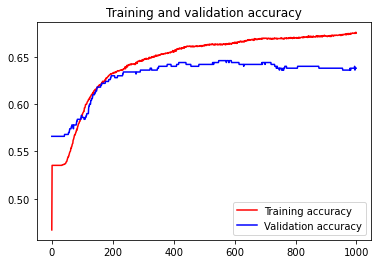

<Figure size 432x288 with 0 Axes>

In [10]:
''' Evaluate your result '''
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [11]:
X_test_enc = fe.transform(X_test_norm).toarray()
print(f"We reach an accuracy score on the test set of {model.evaluate(X_test_enc, y_test, verbose=0)[1]}.")

We reach an accuracy score on the test set of 0.6589999794960022.


## Approach2 - Keras word embedding and MLP classifier

To make it easier for you, I built the preprocessing and the neural network with outliers. It's up to you to understand each step and to put more reasonable values.

It is sometimes necessary to study a little bit the dataset to set these values.

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

FILTERS='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
VOCABULARY_SIZE = 10 # Max size of the vocabulary

# create the tokenizer
tokenizer = Tokenizer(num_words=VOCABULARY_SIZE,
              filters=FILTERS,
              lower=True,
              split=' ',
              oov_token="_UNK_")

# fit the tokenizer on the documents
tokenizer.fit_on_texts(X_train_norm)

# encode documents
X_train_enc2 = tokenizer.texts_to_sequences(X_train)

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

SEQUENCE_SIZE = 5     # Nombre de mots dans une review
PADDING_MODE = 'pre'
PADDING_VALUE = 0
TRUNCATING_MODE='post'

X_train_enc2 = pad_sequences(X_train_enc2,
                            maxlen=SEQUENCE_SIZE,
                            padding=PADDING_MODE,
                            truncating=TRUNCATING_MODE,
                            value=PADDING_VALUE)

In [14]:
'''
To make your task easier, I built a very rudimentary neural network.
It's up to you to make a more sophisticated one.
'''
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding

EMBEDDING_SIZE = 7

# This returns a tensor
inputs = Input(shape=(SEQUENCE_SIZE,))

# Word embedding
embedding = Embedding(VOCABULARY_SIZE,
                      EMBEDDING_SIZE,
                      input_length=SEQUENCE_SIZE)(inputs)

# a layer instance is callable on a tensor, and returns a tensor
flatten = Flatten()(embedding)
predictions = Dense(nb_classes, activation='softmax')(flatten)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
embedding (Embedding)        (None, 5, 7)              70        
_________________________________________________________________
flatten (Flatten)            (None, 35)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 180       
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________


In [15]:
''' Fit your network - don't forget the use of EarlyStopping and other callbacks.'''

history = model.fit(X_train_enc2, 
                    y_train, 
                    batch_size=32,
                    epochs=1000,
                    validation_split=0.1,
                    callbacks=[early_stopping()],
                    verbose=2)

Epoch 1/1000
141/141 - 0s - loss: 1.4742 - accuracy: 0.5162 - val_loss: 1.3556 - val_accuracy: 0.5660
Epoch 2/1000
141/141 - 0s - loss: 1.3265 - accuracy: 0.5353 - val_loss: 1.2725 - val_accuracy: 0.5660
Epoch 3/1000
141/141 - 0s - loss: 1.2850 - accuracy: 0.5353 - val_loss: 1.2494 - val_accuracy: 0.5660
Epoch 4/1000
141/141 - 0s - loss: 1.2712 - accuracy: 0.5353 - val_loss: 1.2405 - val_accuracy: 0.5660
Epoch 5/1000
141/141 - 0s - loss: 1.2641 - accuracy: 0.5353 - val_loss: 1.2361 - val_accuracy: 0.5660
Epoch 6/1000
141/141 - 0s - loss: 1.2596 - accuracy: 0.5353 - val_loss: 1.2334 - val_accuracy: 0.5660
Epoch 7/1000
141/141 - 0s - loss: 1.2564 - accuracy: 0.5353 - val_loss: 1.2321 - val_accuracy: 0.5660
Epoch 8/1000
141/141 - 0s - loss: 1.2538 - accuracy: 0.5353 - val_loss: 1.2310 - val_accuracy: 0.5660
Epoch 9/1000
141/141 - 0s - loss: 1.2516 - accuracy: 0.5353 - val_loss: 1.2301 - val_accuracy: 0.5660
Epoch 10/1000
141/141 - 0s - loss: 1.2498 - accuracy: 0.5353 - val_loss: 1.2295 - 

Epoch 81/1000
141/141 - 0s - loss: 1.2243 - accuracy: 0.5364 - val_loss: 1.2232 - val_accuracy: 0.5620
Epoch 82/1000
141/141 - 0s - loss: 1.2242 - accuracy: 0.5362 - val_loss: 1.2231 - val_accuracy: 0.5620
Epoch 83/1000
141/141 - 0s - loss: 1.2240 - accuracy: 0.5358 - val_loss: 1.2234 - val_accuracy: 0.5620
Epoch 84/1000
141/141 - 0s - loss: 1.2240 - accuracy: 0.5362 - val_loss: 1.2232 - val_accuracy: 0.5620
Epoch 85/1000
141/141 - 0s - loss: 1.2237 - accuracy: 0.5362 - val_loss: 1.2221 - val_accuracy: 0.5600
Epoch 86/1000
141/141 - 0s - loss: 1.2237 - accuracy: 0.5360 - val_loss: 1.2221 - val_accuracy: 0.5600
Epoch 87/1000
141/141 - 0s - loss: 1.2235 - accuracy: 0.5360 - val_loss: 1.2234 - val_accuracy: 0.5620
Epoch 88/1000
141/141 - 0s - loss: 1.2235 - accuracy: 0.5367 - val_loss: 1.2222 - val_accuracy: 0.5600
Epoch 89/1000
141/141 - 0s - loss: 1.2234 - accuracy: 0.5362 - val_loss: 1.2223 - val_accuracy: 0.5600
Epoch 90/1000
141/141 - 0s - loss: 1.2233 - accuracy: 0.5362 - val_loss: 

Epoch 160/1000
141/141 - 0s - loss: 1.2172 - accuracy: 0.5387 - val_loss: 1.2240 - val_accuracy: 0.5520
Epoch 161/1000
141/141 - 0s - loss: 1.2171 - accuracy: 0.5387 - val_loss: 1.2230 - val_accuracy: 0.5520
Epoch 162/1000
141/141 - 0s - loss: 1.2170 - accuracy: 0.5384 - val_loss: 1.2235 - val_accuracy: 0.5520
Epoch 163/1000
141/141 - 0s - loss: 1.2169 - accuracy: 0.5378 - val_loss: 1.2223 - val_accuracy: 0.5580
Epoch 164/1000
141/141 - 0s - loss: 1.2169 - accuracy: 0.5389 - val_loss: 1.2235 - val_accuracy: 0.5520
Epoch 165/1000
141/141 - 0s - loss: 1.2169 - accuracy: 0.5389 - val_loss: 1.2237 - val_accuracy: 0.5520
Epoch 166/1000
141/141 - 0s - loss: 1.2168 - accuracy: 0.5384 - val_loss: 1.2245 - val_accuracy: 0.5500
Epoch 167/1000
141/141 - 0s - loss: 1.2167 - accuracy: 0.5384 - val_loss: 1.2239 - val_accuracy: 0.5500
Epoch 168/1000
141/141 - 0s - loss: 1.2166 - accuracy: 0.5391 - val_loss: 1.2247 - val_accuracy: 0.5520
Epoch 169/1000
141/141 - 0s - loss: 1.2165 - accuracy: 0.5376 - 

Epoch 239/1000
141/141 - 0s - loss: 1.2134 - accuracy: 0.5371 - val_loss: 1.2248 - val_accuracy: 0.5560
Epoch 240/1000
141/141 - 0s - loss: 1.2131 - accuracy: 0.5364 - val_loss: 1.2239 - val_accuracy: 0.5560
Epoch 241/1000
141/141 - 0s - loss: 1.2134 - accuracy: 0.5362 - val_loss: 1.2248 - val_accuracy: 0.5560
Epoch 242/1000
141/141 - 0s - loss: 1.2133 - accuracy: 0.5369 - val_loss: 1.2253 - val_accuracy: 0.5560
Epoch 243/1000
141/141 - 0s - loss: 1.2132 - accuracy: 0.5373 - val_loss: 1.2260 - val_accuracy: 0.5560
Epoch 244/1000
141/141 - 0s - loss: 1.2131 - accuracy: 0.5362 - val_loss: 1.2261 - val_accuracy: 0.5560
Epoch 245/1000
141/141 - 0s - loss: 1.2129 - accuracy: 0.5373 - val_loss: 1.2282 - val_accuracy: 0.5540
Epoch 246/1000
141/141 - 0s - loss: 1.2129 - accuracy: 0.5384 - val_loss: 1.2245 - val_accuracy: 0.5560
Epoch 247/1000
141/141 - 0s - loss: 1.2131 - accuracy: 0.5376 - val_loss: 1.2257 - val_accuracy: 0.5560
Epoch 248/1000
141/141 - 0s - loss: 1.2131 - accuracy: 0.5369 - 

Epoch 318/1000
141/141 - 0s - loss: 1.2107 - accuracy: 0.5369 - val_loss: 1.2281 - val_accuracy: 0.5580
Epoch 319/1000
141/141 - 0s - loss: 1.2106 - accuracy: 0.5367 - val_loss: 1.2262 - val_accuracy: 0.5540
Epoch 320/1000
141/141 - 0s - loss: 1.2106 - accuracy: 0.5369 - val_loss: 1.2267 - val_accuracy: 0.5560
Epoch 321/1000
141/141 - 0s - loss: 1.2106 - accuracy: 0.5371 - val_loss: 1.2279 - val_accuracy: 0.5560
Epoch 322/1000
141/141 - 0s - loss: 1.2103 - accuracy: 0.5376 - val_loss: 1.2270 - val_accuracy: 0.5560
Epoch 323/1000
141/141 - 0s - loss: 1.2105 - accuracy: 0.5382 - val_loss: 1.2267 - val_accuracy: 0.5540
Epoch 324/1000
141/141 - 0s - loss: 1.2105 - accuracy: 0.5378 - val_loss: 1.2267 - val_accuracy: 0.5540
Epoch 325/1000
141/141 - 0s - loss: 1.2105 - accuracy: 0.5371 - val_loss: 1.2272 - val_accuracy: 0.5560
Epoch 326/1000
141/141 - 0s - loss: 1.2104 - accuracy: 0.5371 - val_loss: 1.2268 - val_accuracy: 0.5560
Epoch 327/1000
141/141 - 0s - loss: 1.2105 - accuracy: 0.5371 - 

Epoch 397/1000
141/141 - 0s - loss: 1.2085 - accuracy: 0.5371 - val_loss: 1.2298 - val_accuracy: 0.5560
Epoch 398/1000
141/141 - 0s - loss: 1.2086 - accuracy: 0.5380 - val_loss: 1.2294 - val_accuracy: 0.5560
Epoch 399/1000
141/141 - 0s - loss: 1.2085 - accuracy: 0.5358 - val_loss: 1.2304 - val_accuracy: 0.5500
Epoch 400/1000
141/141 - 0s - loss: 1.2086 - accuracy: 0.5369 - val_loss: 1.2296 - val_accuracy: 0.5560
Epoch 401/1000
141/141 - 0s - loss: 1.2084 - accuracy: 0.5384 - val_loss: 1.2308 - val_accuracy: 0.5500
Epoch 402/1000
141/141 - 0s - loss: 1.2083 - accuracy: 0.5382 - val_loss: 1.2318 - val_accuracy: 0.5500
Epoch 403/1000
141/141 - 0s - loss: 1.2084 - accuracy: 0.5384 - val_loss: 1.2292 - val_accuracy: 0.5560
Epoch 404/1000
141/141 - 0s - loss: 1.2083 - accuracy: 0.5380 - val_loss: 1.2282 - val_accuracy: 0.5540
Epoch 405/1000
141/141 - 0s - loss: 1.2083 - accuracy: 0.5376 - val_loss: 1.2295 - val_accuracy: 0.5560
Epoch 406/1000
141/141 - 0s - loss: 1.2083 - accuracy: 0.5362 - 

Epoch 476/1000
141/141 - 0s - loss: 1.2070 - accuracy: 0.5409 - val_loss: 1.2303 - val_accuracy: 0.5480
Epoch 477/1000
141/141 - 0s - loss: 1.2068 - accuracy: 0.5411 - val_loss: 1.2307 - val_accuracy: 0.5480
Epoch 478/1000
141/141 - 0s - loss: 1.2069 - accuracy: 0.5409 - val_loss: 1.2298 - val_accuracy: 0.5540
Epoch 479/1000
141/141 - 0s - loss: 1.2068 - accuracy: 0.5402 - val_loss: 1.2319 - val_accuracy: 0.5480
Epoch 480/1000
141/141 - 0s - loss: 1.2069 - accuracy: 0.5400 - val_loss: 1.2306 - val_accuracy: 0.5480
Epoch 481/1000
141/141 - 0s - loss: 1.2067 - accuracy: 0.5393 - val_loss: 1.2311 - val_accuracy: 0.5500
Epoch 482/1000
141/141 - 0s - loss: 1.2066 - accuracy: 0.5398 - val_loss: 1.2291 - val_accuracy: 0.5520
Epoch 483/1000
141/141 - 0s - loss: 1.2068 - accuracy: 0.5384 - val_loss: 1.2302 - val_accuracy: 0.5540
Epoch 484/1000
141/141 - 0s - loss: 1.2068 - accuracy: 0.5416 - val_loss: 1.2302 - val_accuracy: 0.5540
Epoch 485/1000
141/141 - 0s - loss: 1.2068 - accuracy: 0.5393 - 

Epoch 555/1000
141/141 - 0s - loss: 1.2054 - accuracy: 0.5411 - val_loss: 1.2300 - val_accuracy: 0.5560
Epoch 556/1000
141/141 - 0s - loss: 1.2055 - accuracy: 0.5413 - val_loss: 1.2305 - val_accuracy: 0.5480
Epoch 557/1000
141/141 - 0s - loss: 1.2054 - accuracy: 0.5411 - val_loss: 1.2319 - val_accuracy: 0.5480
Epoch 558/1000
141/141 - 0s - loss: 1.2056 - accuracy: 0.5411 - val_loss: 1.2309 - val_accuracy: 0.5480
Epoch 559/1000
141/141 - 0s - loss: 1.2055 - accuracy: 0.5424 - val_loss: 1.2313 - val_accuracy: 0.5480
Epoch 560/1000
141/141 - 0s - loss: 1.2054 - accuracy: 0.5402 - val_loss: 1.2308 - val_accuracy: 0.5480
Epoch 561/1000
141/141 - 0s - loss: 1.2054 - accuracy: 0.5404 - val_loss: 1.2306 - val_accuracy: 0.5480
Epoch 562/1000
141/141 - 0s - loss: 1.2052 - accuracy: 0.5413 - val_loss: 1.2302 - val_accuracy: 0.5540
Epoch 563/1000
141/141 - 0s - loss: 1.2054 - accuracy: 0.5436 - val_loss: 1.2305 - val_accuracy: 0.5480
Epoch 564/1000
141/141 - 0s - loss: 1.2054 - accuracy: 0.5402 - 

Epoch 634/1000
141/141 - 0s - loss: 1.2043 - accuracy: 0.5413 - val_loss: 1.2313 - val_accuracy: 0.5480
Epoch 635/1000
141/141 - 0s - loss: 1.2043 - accuracy: 0.5420 - val_loss: 1.2314 - val_accuracy: 0.5460
Epoch 636/1000
141/141 - 0s - loss: 1.2042 - accuracy: 0.5411 - val_loss: 1.2300 - val_accuracy: 0.5460
Epoch 637/1000
141/141 - 0s - loss: 1.2044 - accuracy: 0.5418 - val_loss: 1.2308 - val_accuracy: 0.5480
Epoch 638/1000
141/141 - 0s - loss: 1.2041 - accuracy: 0.5420 - val_loss: 1.2314 - val_accuracy: 0.5480
Epoch 639/1000
141/141 - 0s - loss: 1.2042 - accuracy: 0.5407 - val_loss: 1.2307 - val_accuracy: 0.5480
Epoch 640/1000
141/141 - 0s - loss: 1.2042 - accuracy: 0.5418 - val_loss: 1.2313 - val_accuracy: 0.5480
Epoch 641/1000
141/141 - 0s - loss: 1.2042 - accuracy: 0.5416 - val_loss: 1.2304 - val_accuracy: 0.5480
Epoch 642/1000
141/141 - 0s - loss: 1.2043 - accuracy: 0.5411 - val_loss: 1.2315 - val_accuracy: 0.5480
Epoch 643/1000
141/141 - 0s - loss: 1.2042 - accuracy: 0.5413 - 

Epoch 713/1000
141/141 - 0s - loss: 1.2034 - accuracy: 0.5409 - val_loss: 1.2302 - val_accuracy: 0.5440
Epoch 714/1000
141/141 - 0s - loss: 1.2033 - accuracy: 0.5411 - val_loss: 1.2324 - val_accuracy: 0.5460
Epoch 715/1000
141/141 - 0s - loss: 1.2034 - accuracy: 0.5418 - val_loss: 1.2315 - val_accuracy: 0.5460
Epoch 716/1000
141/141 - 0s - loss: 1.2034 - accuracy: 0.5418 - val_loss: 1.2311 - val_accuracy: 0.5460
Epoch 717/1000
141/141 - 0s - loss: 1.2033 - accuracy: 0.5418 - val_loss: 1.2309 - val_accuracy: 0.5460
Epoch 718/1000
141/141 - 0s - loss: 1.2032 - accuracy: 0.5413 - val_loss: 1.2301 - val_accuracy: 0.5440
Epoch 719/1000
141/141 - 0s - loss: 1.2034 - accuracy: 0.5420 - val_loss: 1.2306 - val_accuracy: 0.5440
Epoch 720/1000
141/141 - 0s - loss: 1.2032 - accuracy: 0.5402 - val_loss: 1.2330 - val_accuracy: 0.5440
Epoch 721/1000
141/141 - 0s - loss: 1.2033 - accuracy: 0.5416 - val_loss: 1.2301 - val_accuracy: 0.5440
Epoch 722/1000
141/141 - 0s - loss: 1.2033 - accuracy: 0.5402 - 

Epoch 792/1000
141/141 - 0s - loss: 1.2025 - accuracy: 0.5424 - val_loss: 1.2296 - val_accuracy: 0.5420
Epoch 793/1000
141/141 - 0s - loss: 1.2026 - accuracy: 0.5407 - val_loss: 1.2315 - val_accuracy: 0.5420
Epoch 794/1000
141/141 - 0s - loss: 1.2026 - accuracy: 0.5413 - val_loss: 1.2315 - val_accuracy: 0.5420
Epoch 795/1000
141/141 - 0s - loss: 1.2026 - accuracy: 0.5413 - val_loss: 1.2304 - val_accuracy: 0.5440
Epoch 796/1000
141/141 - 0s - loss: 1.2025 - accuracy: 0.5420 - val_loss: 1.2307 - val_accuracy: 0.5440
Epoch 797/1000
141/141 - 0s - loss: 1.2026 - accuracy: 0.5424 - val_loss: 1.2306 - val_accuracy: 0.5440
Epoch 798/1000
141/141 - 0s - loss: 1.2023 - accuracy: 0.5427 - val_loss: 1.2326 - val_accuracy: 0.5440
Epoch 799/1000
141/141 - 0s - loss: 1.2026 - accuracy: 0.5416 - val_loss: 1.2307 - val_accuracy: 0.5440
Epoch 800/1000
141/141 - 0s - loss: 1.2025 - accuracy: 0.5409 - val_loss: 1.2302 - val_accuracy: 0.5440
Epoch 801/1000
141/141 - 0s - loss: 1.2024 - accuracy: 0.5418 - 

Epoch 871/1000
141/141 - 0s - loss: 1.2020 - accuracy: 0.5416 - val_loss: 1.2300 - val_accuracy: 0.5440
Epoch 872/1000
141/141 - 0s - loss: 1.2021 - accuracy: 0.5418 - val_loss: 1.2304 - val_accuracy: 0.5420
Epoch 873/1000
141/141 - 0s - loss: 1.2021 - accuracy: 0.5416 - val_loss: 1.2303 - val_accuracy: 0.5420
Epoch 874/1000
141/141 - 0s - loss: 1.2020 - accuracy: 0.5418 - val_loss: 1.2296 - val_accuracy: 0.5440
Epoch 875/1000
141/141 - 0s - loss: 1.2021 - accuracy: 0.5418 - val_loss: 1.2302 - val_accuracy: 0.5420
Epoch 876/1000
141/141 - 0s - loss: 1.2020 - accuracy: 0.5427 - val_loss: 1.2303 - val_accuracy: 0.5420
Epoch 877/1000
141/141 - 0s - loss: 1.2020 - accuracy: 0.5427 - val_loss: 1.2305 - val_accuracy: 0.5420
Epoch 878/1000
141/141 - 0s - loss: 1.2019 - accuracy: 0.5424 - val_loss: 1.2297 - val_accuracy: 0.5440
Epoch 879/1000
141/141 - 0s - loss: 1.2019 - accuracy: 0.5418 - val_loss: 1.2314 - val_accuracy: 0.5420
Epoch 880/1000
141/141 - 0s - loss: 1.2020 - accuracy: 0.5416 - 

Epoch 950/1000
141/141 - 0s - loss: 1.2016 - accuracy: 0.5416 - val_loss: 1.2311 - val_accuracy: 0.5420
Epoch 951/1000
141/141 - 0s - loss: 1.2017 - accuracy: 0.5422 - val_loss: 1.2291 - val_accuracy: 0.5420
Epoch 952/1000
141/141 - 0s - loss: 1.2017 - accuracy: 0.5427 - val_loss: 1.2306 - val_accuracy: 0.5420
Epoch 953/1000
141/141 - 0s - loss: 1.2016 - accuracy: 0.5416 - val_loss: 1.2318 - val_accuracy: 0.5420
Epoch 954/1000
141/141 - 0s - loss: 1.2017 - accuracy: 0.5416 - val_loss: 1.2305 - val_accuracy: 0.5420
Epoch 955/1000
141/141 - 0s - loss: 1.2016 - accuracy: 0.5422 - val_loss: 1.2295 - val_accuracy: 0.5420
Epoch 956/1000
141/141 - 0s - loss: 1.2017 - accuracy: 0.5418 - val_loss: 1.2301 - val_accuracy: 0.5420
Epoch 957/1000
141/141 - 0s - loss: 1.2016 - accuracy: 0.5418 - val_loss: 1.2292 - val_accuracy: 0.5440
Epoch 958/1000
141/141 - 0s - loss: 1.2015 - accuracy: 0.5422 - val_loss: 1.2289 - val_accuracy: 0.5420
Epoch 959/1000
141/141 - 0s - loss: 1.2017 - accuracy: 0.5429 - 

<Figure size 432x288 with 0 Axes>

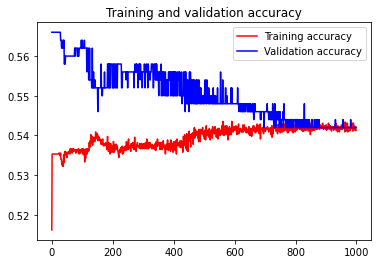

<Figure size 432x288 with 0 Axes>

In [16]:
''' Evaluate your result '''
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [17]:
X_test_enc2 =  tokenizer.texts_to_sequences(X_test)
X_test_enc2 = pad_sequences(X_test_enc2,
                            maxlen=SEQUENCE_SIZE,
                            padding=PADDING_MODE,
                            truncating=TRUNCATING_MODE,
                            value=PADDING_VALUE)

print(f"We reach an accuracy score on the test set of {model.evaluate(X_test_enc2, y_test, verbose=0)[1]}.")

We reach an accuracy score on the test set of 0.5400000214576721.


## Approach3 - Pre-trained word embedding and MLP classifier

The tutorial [using pre-trained word embeddings in a Keras model](https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html) contain all needed informations.

In [18]:
# Global variable declaration
MAX_NB_WORDS = 20
MAX_SEQUENCE_LENGTH = 20
VALIDATION_SPLIT = 0.1
GLOVE_DIR = "/home/qlr/Downloads/GLOVE_DIR/"
EMBEDDING_DIM = 100

In [19]:
# Text pre-processing
from keras.utils import to_categorical

tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(y_train))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

/home/qlr/anaconda3/lib/python3.8/site-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 7169 unique tokens.
Shape of data tensor: (5000, 20)
Shape of label tensor: (5000, 5)


In [20]:
y_train.shape

(5000,)

In [21]:
# Train-Val split
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train_1d = data[:-nb_validation_samples]
y_train_1d = labels[:-nb_validation_samples]
x_val_1d = data[-nb_validation_samples:]
y_val_1d = labels[-nb_validation_samples:]

In [22]:
# Embedding layer preparation
import os 

embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [23]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [24]:
from keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [31]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Training a 1D convnet
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 2, activation='relu')(embedded_sequences)
x = MaxPooling1D(3)(x)  # global max pooling
x = Conv1D(64, 2, activation='relu')(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(5, activation='softmax')(x)

model = Model(sequence_input, preds)

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 20, 100)           717000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 19, 128)           25728     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5, 64)             16448     
_________________________________________________________________
flatten_2 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               4108

In [32]:
history = model.fit(x_train_1d, y_train_1d, 
          validation_data=(x_val_1d, y_val_1d),
          epochs=100, 
          batch_size=32,
          callbacks=[early_stopping()],
          verbose=2
         )

Epoch 1/100
141/141 - 1s - loss: 1.2753 - accuracy: 0.5282 - val_loss: 1.2502 - val_accuracy: 0.5220
Epoch 2/100
141/141 - 1s - loss: 1.2139 - accuracy: 0.5376 - val_loss: 1.2710 - val_accuracy: 0.5140
Epoch 3/100
141/141 - 0s - loss: 1.1875 - accuracy: 0.5576 - val_loss: 1.2414 - val_accuracy: 0.5440
Epoch 4/100
141/141 - 0s - loss: 1.1537 - accuracy: 0.5676 - val_loss: 1.2448 - val_accuracy: 0.5380
Epoch 5/100
141/141 - 0s - loss: 1.1170 - accuracy: 0.5909 - val_loss: 1.3314 - val_accuracy: 0.5460
Epoch 6/100
141/141 - 0s - loss: 1.0808 - accuracy: 0.6080 - val_loss: 1.3333 - val_accuracy: 0.5320
Epoch 7/100
141/141 - 0s - loss: 1.0471 - accuracy: 0.6153 - val_loss: 1.3114 - val_accuracy: 0.5380
Epoch 8/100
141/141 - 0s - loss: 1.0041 - accuracy: 0.6313 - val_loss: 1.3872 - val_accuracy: 0.4820
Epoch 9/100
141/141 - 0s - loss: 0.9551 - accuracy: 0.6656 - val_loss: 1.4122 - val_accuracy: 0.5400
Epoch 10/100
141/141 - 0s - loss: 0.9104 - accuracy: 0.6811 - val_loss: 1.4226 - val_accura

Epoch 82/100
141/141 - 0s - loss: 0.3568 - accuracy: 0.8931 - val_loss: 5.5871 - val_accuracy: 0.5000
Epoch 83/100
141/141 - 1s - loss: 0.3533 - accuracy: 0.8898 - val_loss: 5.4442 - val_accuracy: 0.5020
Epoch 84/100
141/141 - 0s - loss: 0.3598 - accuracy: 0.8889 - val_loss: 5.6649 - val_accuracy: 0.4880
Epoch 85/100
141/141 - 0s - loss: 0.3587 - accuracy: 0.8916 - val_loss: 5.8951 - val_accuracy: 0.5040
Epoch 86/100
141/141 - 0s - loss: 0.3579 - accuracy: 0.8902 - val_loss: 6.2402 - val_accuracy: 0.4900
Epoch 87/100
141/141 - 0s - loss: 0.3556 - accuracy: 0.8911 - val_loss: 6.0416 - val_accuracy: 0.4800
Epoch 88/100
141/141 - 0s - loss: 0.3539 - accuracy: 0.8904 - val_loss: 5.7609 - val_accuracy: 0.5000
Epoch 89/100
141/141 - 0s - loss: 0.3521 - accuracy: 0.8916 - val_loss: 6.1959 - val_accuracy: 0.5000
Epoch 90/100
141/141 - 0s - loss: 0.3530 - accuracy: 0.8924 - val_loss: 5.8382 - val_accuracy: 0.4840
Epoch 91/100
141/141 - 0s - loss: 0.3582 - accuracy: 0.8909 - val_loss: 5.7212 - v

<Figure size 432x288 with 0 Axes>

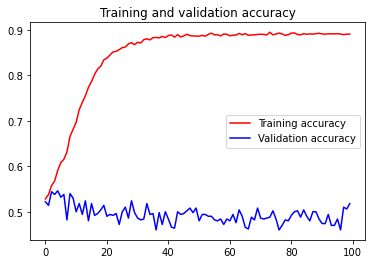

<Figure size 432x288 with 0 Axes>

In [33]:
''' Evaluate your result '''
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [34]:
sequences = tokenizer.texts_to_sequences(X_test)
X_test_enc3 = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y_test_enc3 = to_categorical(np.asarray(y_test))

print(f"We reach an accuracy score on the test set of {model.evaluate(X_test_enc3, y_test_enc3, verbose=0)[1]}.")

We reach an accuracy score on the test set of 0.5350000262260437.


## Conclusion

Compare the three approaches with the results obtained by a BOW approach followed by Logistic Regression.

## Come back to your favourite sentence...

Can you build the embedding of your 5 sentences with a pre-trained embedding and see if the result is more relevant than before?

Warning: this part is quite difficult unless you have understood approach 3 very well. So don't worry if you don't succeed. I will explain some solution later